In [114]:
#Importación de funcionalidad
import numpy as np
import scipy as sp
from PIL import Image
from ipywidgets import interact
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
def Lattice_gencu(N : np.uint32): #Inicia la grilla en estado "frío" con spines arriba
    return np.ones((N,N))

In [3]:
def Lattice_gencd(N : np.uint32 ): #Inicia la grilla en estado "frío" con spines abajo
     return -np.ones((N,N))

In [4]:
def Lattice_genh(N : np.uint32 ): #Inicia la grilla con una distribución de spines random.
    return np.random.choice([-1,1], size = (N,N))

In [5]:
def Energy_of_configuration(spin: np.int8): 
    kernel = sp.ndimage.generate_binary_structure(2,1)
    kernel[1][1] = False
    E_0 = spin*sp.ndimage.convolve(spin, kernel, mode= 'constant')
    
    return np.sum(E_0, dtype = np.int32)

In [6]:
def Magnetization_of_configuration(spin : np.int8):
    return np.sum(spin,dtype = np.int32)

In [61]:
 def Configuration_update_H(β : np.float32, J : np.float32, spin : np.int8 , H = 0.0, iterations= 20000):
        N = spin.shape[0]
        random_condition_energy = np.random.default_rng().random(iterations)
        
        probE = { -8 : np.exp(-8*β*J),
                  -4 : np.exp(-4*β*J),
                   0 : 1,
                   4 : np.exp(4*β*J),
                   8 : np.exp(8*β*J)}
        
        probM = { -2: np.exp(-2*β*H),
                   2: np.exp(2*β*H)}
        
        for i in range(0,iterations):
            spin1 = np.copy(spin)
            row, col = np.random.randint(N), np.random.randint(N)
            spin1[row][col] = -1 if (spin[row][col] > 0) else 1
            dE = 2*spin1[row,col]*(spin1[(row + 1)%N, col] + spin1[(row - 1)%N, col] + spin1[row , (col + 1)%N] + spin1[row , (col - 1)%N])
            dM = 2*spin1[row,col]
            δH = -H*dM -J*dE
            
            if(random_condition_energy[i] < probM[dM]*probE[dE]):
                spin = spin1

        return spin

In [155]:
spin = Lattice_genh(50)
spin1 = Configuration_update_H(2.0,1,spin, iterations= 5000000)
print(Magnetization_of_configuration(spin1)/spin1.size, "\n", spin1)

1.0 
 [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


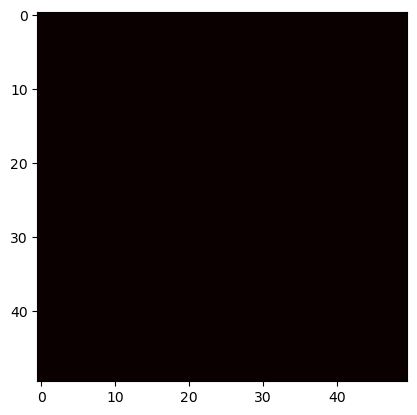

In [156]:
plt.imshow(spin1,cmap='hot')

## Animación de la termalización del modelo de Ising

In [8]:
def display_spin(spin : np.int8 ):
    return Image.fromarray(np.uint8((spin+1)*0.5*255))

In [29]:
def display_ising_sequence(images):
    def show(frame=(0, images.shape[2]-1)):
        return display_spin(images[:,:,frame])
    return interact(show)

In [27]:
lattice = Lattice_gencd(200)
steps = 200

images = np.zeros((lattice.shape[0],lattice.shape[1], steps))

for i in range(steps-1):
    images[:,:,i] = Configuration_update_H(0.1, 1.0, lattice, iterations = i*steps)

In [30]:
display_ising_sequence(images)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.display_ising_sequence.<locals>.show(frame=(0, 200))>

In [12]:
def Ising_model(iterations):
    pass
    
    T = np.linspace(0.000001, 10000.0, N**2)
    energy= magnetization = heat_capacity = np.zeros(N**2), np.zeros(N**2), np.zeros(N**2)
    n1 = 1/N**2
    n2 = 1/N**4
    
    for t in range(iterations):
        spin = Lattice_gencu(N)
        
        energy1 = magn1= energy2 = magn2 = 0
        
        β = 1/T
        β2 = β**2
        
        for _ in range(N**2):
            Configuration_update_H(β, 1,0, spin, )
    